In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('Diabetes Dataset/Dataset of Diabetes .csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
data = data.replace([np.inf, -np.inf], np.nan)

In [7]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Gender', 'CLASS'] 



,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
data = data.dropna()

In [9]:
data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [10]:
del data['ID']

In [11]:
data['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [12]:
# changing attack labels to their respective attack class
def change_label(df):
  df.CLASS.replace(['P','Y '],'Y',inplace=True)
  df.CLASS.replace(['N '],'N',inplace=True)

In [13]:
change_label(data)

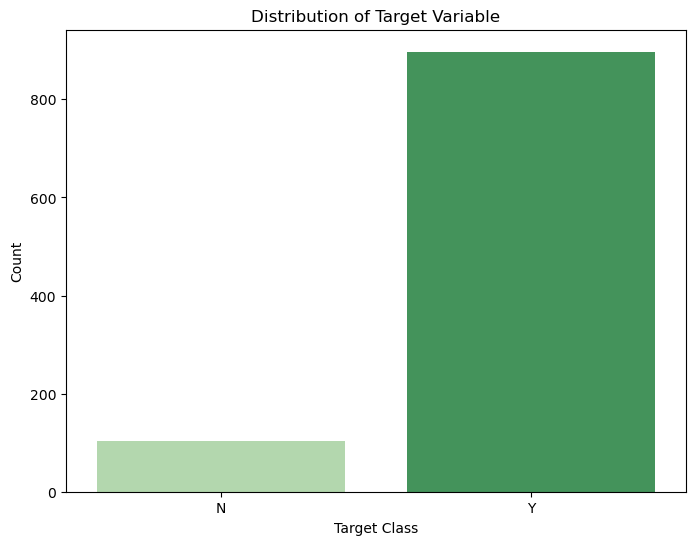

In [14]:
# Plotting the distribution of the binary target variable y
plt.figure(figsize=(8, 6))
sns.countplot(x=data['CLASS'], palette='Greens')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

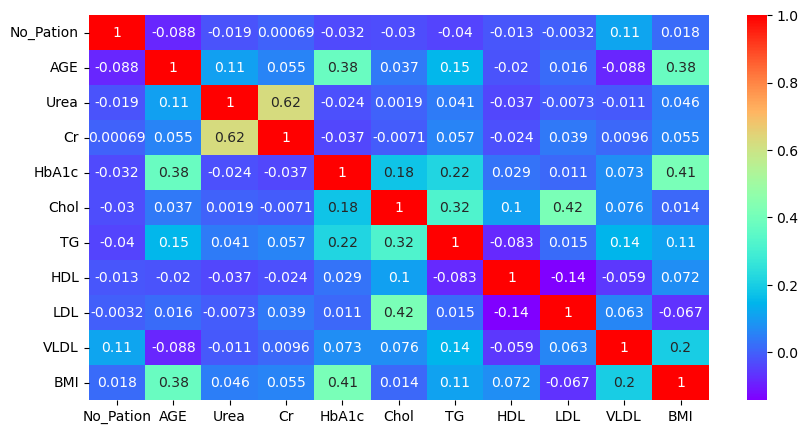

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [16]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['CLASS']= label_encoder.fit_transform(data['CLASS']) 

In [17]:
X = data.drop(["CLASS"],axis =1)
y = data["CLASS"]

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

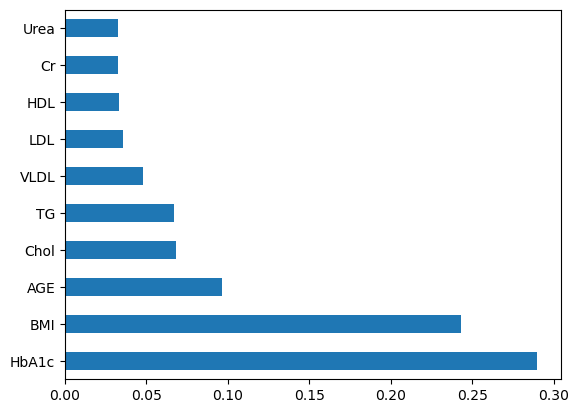

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show() 

In [21]:
data.columns

Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [22]:
data = data[['Urea','Cr','HDL','LDL', 'VLDL','TG','Chol', 'AGE','BMI', 'HbA1c', 'CLASS']]

In [23]:
data.head()

,Urea,Cr,HDL,LDL,VLDL,TG,Chol,AGE,BMI,HbA1c,CLASS
0,4.7,46,2.4,1.4,0.5,0.9,4.2,50,24.0,4.9,0
1,4.5,62,1.1,2.1,0.6,1.4,3.7,26,23.0,4.9,0
2,4.7,46,2.4,1.4,0.5,0.9,4.2,50,24.0,4.9,0
3,4.7,46,2.4,1.4,0.5,0.9,4.2,50,24.0,4.9,0
4,7.1,46,0.8,2.0,0.4,1.0,4.9,33,21.0,4.9,0


In [24]:
X = data.drop(["CLASS"],axis =1)
y = data["CLASS"]

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
ada = SMOTE(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

In [27]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [28]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [29]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

# LSTM

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, SimpleRNN, Bidirectional, GRU
from tensorflow.keras.optimizers import RMSprop

In [32]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [34]:
model5 = Sequential()
model5.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model5.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history5 = model5.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=30,verbose=1,callbacks=[callback])

Epoch 1/30
355/355 [==============================] - 7s 7ms/step - loss: 0.4176 - accuracy: 0.8901 - val_loss: 0.2327 - val_accuracy: 0.9290
Epoch 2/30
355/355 [==============================] - 2s 5ms/step - loss: 0.1833 - accuracy: 0.9465 - val_loss: 0.1652 - val_accuracy: 0.9454
Epoch 3/30
355/355 [==============================] - 2s 5ms/step - loss: 0.1457 - accuracy: 0.9507 - val_loss: 0.1585 - val_accuracy: 0.9454
Epoch 4/30
355/355 [==============================] - 2s 6ms/step - loss: 0.1325 - accuracy: 0.9535 - val_loss: 0.1561 - val_accuracy: 0.9454
Epoch 5/30
355/355 [==============================] - 2s 6ms/step - loss: 0.1304 - accuracy: 0.9592 - val_loss: 0.1543 - val_accuracy: 0.9481
Epoch 6/30
355/355 [==============================] - 2s 5ms/step - loss: 0.1237 - accuracy: 0.9634 - val_loss: 0.1508 - val_accuracy: 0.9481
Epoch 7/30
355/355 [==============================] - 2s 5ms/step - loss: 0.1207 - accuracy: 0.9606 - val_loss: 0.1519 - val_accuracy: 0.9481
Epoch 

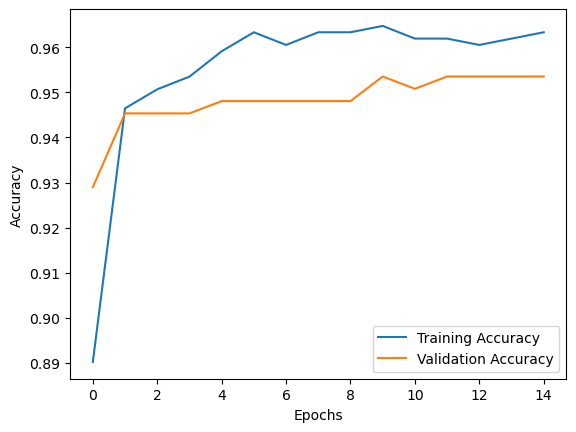

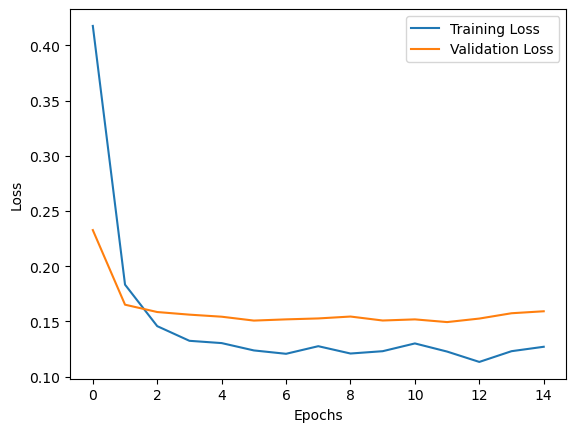

In [36]:
# Plotting akurasi
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
y_pred_prob = model5.predict(X_test)
y_pred1 = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred1)
dl_prec = precision_score(y_test,y_pred1)
dl_rec = recall_score(y_test,y_pred1)
dl_f1 = f1_score(y_test,y_pred1)

23/23 [==============================] - 0s 2ms/step


In [38]:
storeResults('LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

# ANN

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Build the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=2, validation_split=0.2)

Epoch 1/30
430/430 [==============================] - 3s 5ms/step - loss: 0.6946 - accuracy: 0.6977 - val_loss: 0.2271 - val_accuracy: 0.9398
Epoch 2/30
430/430 [==============================] - 2s 5ms/step - loss: 0.6008 - accuracy: 0.7081 - val_loss: 0.2313 - val_accuracy: 0.8935
Epoch 3/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5567 - accuracy: 0.7349 - val_loss: 0.2195 - val_accuracy: 0.9306
Epoch 4/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5494 - accuracy: 0.7186 - val_loss: 0.2268 - val_accuracy: 0.9306
Epoch 5/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5343 - accuracy: 0.7256 - val_loss: 0.2162 - val_accuracy: 0.9444
Epoch 6/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5517 - accuracy: 0.7093 - val_loss: 0.2098 - val_accuracy: 0.9398
Epoch 7/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5154 - accuracy: 0.7384 - val_loss: 0.2311 - val_accuracy: 0.9352
Epoch 

In [42]:
# Evaluate the model on the testing set
predict_x=model.predict(X_test) 
y_pred2=np.argmax(predict_x,axis=1)

23/23 [==============================] - 0s 2ms/step


In [43]:
dl_acc = accuracy_score(y_test,y_pred2)
dl_prec = precision_score(y_test,y_pred2)
dl_rec = recall_score(y_test,y_pred2)
dl_f1 = f1_score(y_test,y_pred2)

storeResults('ANN',dl_acc,dl_prec,dl_rec,dl_f1)

# CNN

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

In [46]:
def build_model(input_shape):
    model = Sequential()
    
    model.add(Conv1D(64, 1, activation='tanh', input_shape=input_shape))
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    
    model.add(Conv1D(32, 2, activation='tanh'))  # Added another convolutional layer
    model.add(MaxPooling1D(2))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
    
    model.add(Conv1D(16, 2, activation='tanh'))  # Added another convolutional layer
    model.add(MaxPooling1D(1))  # Increased pooling window size
    model.add(Dropout(0.1))  # Adjusted dropout rate
        
    model.add(Flatten())
    model.add(Dense(8, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    return model

In [47]:
# Build the model
model1 = build_model((X_train.shape[1], 1))
model1.summary()
# Compile the model (assuming learning rate and optimizer values are chosen)
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 10, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 4, 32)            

In [48]:
history1 = model1.fit(X_train, y_train, validation_split=0.34,shuffle=True,epochs=30,batch_size=2, verbose=1,callbacks=[callback])

Epoch 1/30
355/355 [==============================] - 6s 6ms/step - loss: 0.6949 - accuracy: 0.5380 - val_loss: 0.6575 - val_accuracy: 0.5464
Epoch 2/30
355/355 [==============================] - 2s 5ms/step - loss: 0.6321 - accuracy: 0.6493 - val_loss: 0.6019 - val_accuracy: 0.7186
Epoch 3/30
355/355 [==============================] - 2s 5ms/step - loss: 0.6184 - accuracy: 0.6831 - val_loss: 0.5956 - val_accuracy: 0.6639
Epoch 4/30
355/355 [==============================] - 2s 5ms/step - loss: 0.5884 - accuracy: 0.6915 - val_loss: 0.6098 - val_accuracy: 0.6885
Epoch 5/30
355/355 [==============================] - 2s 5ms/step - loss: 0.5849 - accuracy: 0.6986 - val_loss: 0.6075 - val_accuracy: 0.6831
Epoch 6/30
355/355 [==============================] - 2s 5ms/step - loss: 0.5698 - accuracy: 0.7211 - val_loss: 0.5745 - val_accuracy: 0.7350
Epoch 7/30
355/355 [==============================] - 2s 5ms/step - loss: 0.5777 - accuracy: 0.7099 - val_loss: 0.5729 - val_accuracy: 0.7350
Epoch 

In [49]:
y_pred_prob = model1.predict(X_test)
y_pred3 = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred3)
dl_prec = precision_score(y_test,y_pred3)
dl_rec = recall_score(y_test,y_pred3)
dl_f1 = f1_score(y_test,y_pred3)

23/23 [==============================] - 0s 2ms/step


In [50]:
storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1)

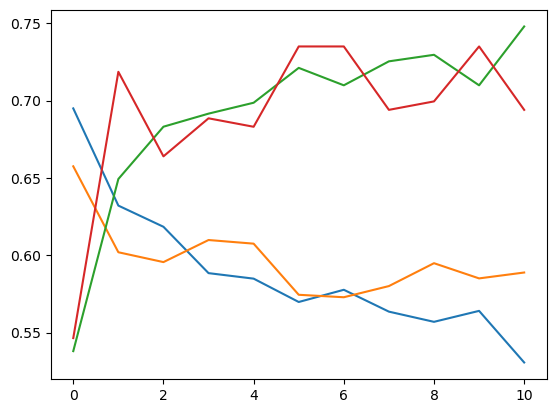

In [51]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

# CNN + LSTM

In [52]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.4, random_state=42)

In [53]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Reshape, GRU

In [54]:
def build_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(1))
    model.add(Dropout(0.1))
    model.add(Flatten())
    # Mengubah bentuk ke (batch_size, timesteps, features)
    model.add(Reshape((input_shape[0], 32)))
    model.add(LSTM(50, activation='tanh', return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [55]:
model7 = build_model((X_train.shape[1], 1))
model7.compile(loss='binary_crossentropy', metrics=['accuracy'])
model7.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 10, 32)            64        
                                                                 
 batch_normalization_3 (Batc  (None, 10, 32)           128       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 10, 32)            0         
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 reshape (Reshape)           (None, 10, 32)           

In [56]:
history7 = model7.fit(X_train, y_train, batch_size=2, validation_split=0.34,shuffle=True,epochs=30,verbose=1,callbacks=[callback])

Epoch 1/30
355/355 [==============================] - 5s 10ms/step - loss: 0.4964 - accuracy: 0.8732 - val_loss: 0.3046 - val_accuracy: 0.9262
Epoch 2/30
355/355 [==============================] - 3s 8ms/step - loss: 0.2785 - accuracy: 0.9211 - val_loss: 0.2007 - val_accuracy: 0.9454
Epoch 3/30
355/355 [==============================] - 3s 8ms/step - loss: 0.2308 - accuracy: 0.9394 - val_loss: 0.1699 - val_accuracy: 0.9617
Epoch 4/30
355/355 [==============================] - 3s 8ms/step - loss: 0.2041 - accuracy: 0.9408 - val_loss: 0.1619 - val_accuracy: 0.9645
Epoch 5/30
355/355 [==============================] - 3s 8ms/step - loss: 0.1631 - accuracy: 0.9394 - val_loss: 0.1887 - val_accuracy: 0.9508
Epoch 6/30
355/355 [==============================] - 3s 8ms/step - loss: 0.1460 - accuracy: 0.9577 - val_loss: 0.1082 - val_accuracy: 0.9781
Epoch 7/30
355/355 [==============================] - 3s 8ms/step - loss: 0.1358 - accuracy: 0.9620 - val_loss: 0.1112 - val_accuracy: 0.9672
Epoch

In [57]:
y_pred_prob = model7.predict(X_test)
y_pred4 = (y_pred_prob > 0.55).astype("int32")

dl_acc = accuracy_score(y_test,y_pred4)
dl_prec = precision_score(y_test,y_pred4)
dl_rec = recall_score(y_test,y_pred4)
dl_f1 = f1_score(y_test,y_pred4)

23/23 [==============================] - 0s 2ms/step


In [58]:
storeResults('CNN+LSTM',dl_acc,dl_prec,dl_rec,dl_f1)

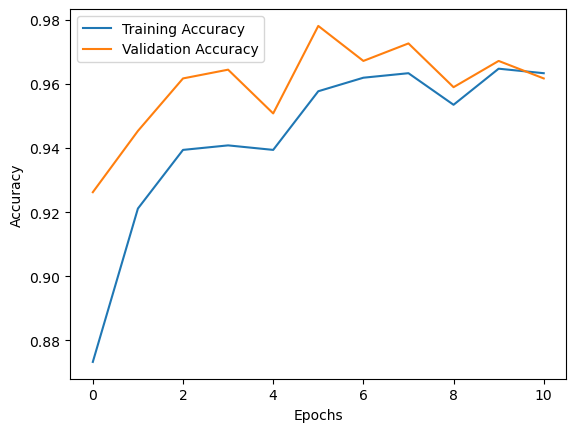

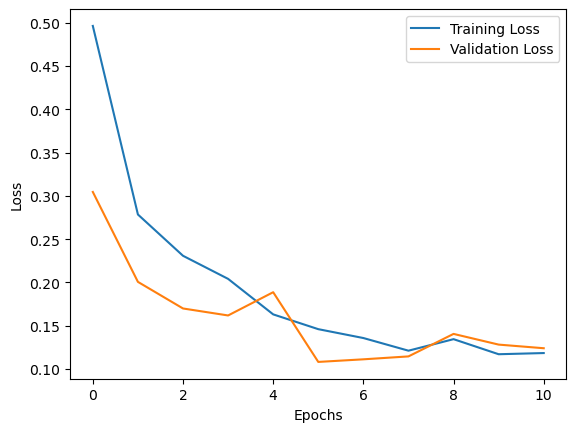

In [59]:
# Plotting akurasi
plt.plot(history7.history['accuracy'], label='Training Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting kerugian
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Stacking

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.4, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[LightGBM] [Info] Number of positive: 525, number of negative: 551
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Number of data points in the train set: 1076, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487918 -> initscore=-0.048337
[LightGBM] [Info] Start training from score -0.048337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# Stack-LSTM

In [63]:
ml_acc = accuracy_score(y_pred,y_pred1)
ml_prec = precision_score(y_pred,y_pred1)
ml_rec = recall_score(y_pred,y_pred1)
ml_f1 = f1_score(y_pred,y_pred1)

storeResults('Stack-LSTM',ml_acc,ml_prec,ml_rec,ml_f1)

# Stack-ANN

In [64]:
ml_acc = accuracy_score(y_pred,y_pred2)
ml_prec = precision_score(y_pred,y_pred2)
ml_rec = recall_score(y_pred,y_pred2)
ml_f1 = f1_score(y_pred,y_pred2)

storeResults('Stack-ANN',ml_acc,ml_prec,ml_rec,ml_f1)

# Stack-CNN

In [65]:
ml_acc = accuracy_score(y_pred,y_pred3)
ml_prec = precision_score(y_pred,y_pred3)
ml_rec = recall_score(y_pred,y_pred3)
ml_f1 = f1_score(y_pred,y_pred3)

storeResults('Stack-CNN',ml_acc,ml_prec,ml_rec,ml_f1)

# Stack-CNN+LSTM

In [66]:
ml_acc = accuracy_score(y_pred,y_pred4)
ml_prec = precision_score(y_pred,y_pred4)
ml_rec = recall_score(y_pred,y_pred4)
ml_f1 = f1_score(y_pred,y_pred4)

storeResults('Stack-CNN+LSTM',ml_acc,ml_prec,ml_rec,ml_f1)

# ML

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

# SVC

In [68]:
from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo',probability=True)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [71]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Extension

In [76]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

bet = BaggingClassifier(ExtraTreesClassifier())

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

model = VotingClassifier(estimators= [('BoostDT', bdt),('RF', rf),('BagET', bet)], voting='soft')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ext_acc = accuracy_score(y_pred, y_test)
ext_prec = precision_score(y_pred, y_test,average='weighted')
ext_rec = recall_score(y_pred, y_test,average='weighted')
ext_f1 = f1_score(y_pred, y_test,average='weighted')

In [73]:
storeResults('Extension',ext_acc,ext_prec,ext_rec,ext_f1)

# Comparison

In [74]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [75]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,LSTM,0.972,0.994,0.952,0.973
1,ANN,0.482,0.000,0.000,0.000
2,CNN,0.678,0.862,0.452,0.593
3,CNN+LSTM,0.962,1.000,0.927,0.962
4,Stack-LSTM,0.978,0.994,0.962,0.978
5,Stack-ANN,0.487,0.000,0.000,0.000
6,Stack-CNN,0.678,0.851,0.451,0.590
7,Stack-CNN+LSTM,0.968,1.000,0.938,0.968
8,SVM,0.937,0.944,0.937,0.937
9,DecisionTree,0.987,0.987,0.987,0.987


# Modelling

In [77]:
import joblib
filename = 'model_data3.sav'
joblib.dump(model, filename)

['model_data3.sav']

# Graph

In [78]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

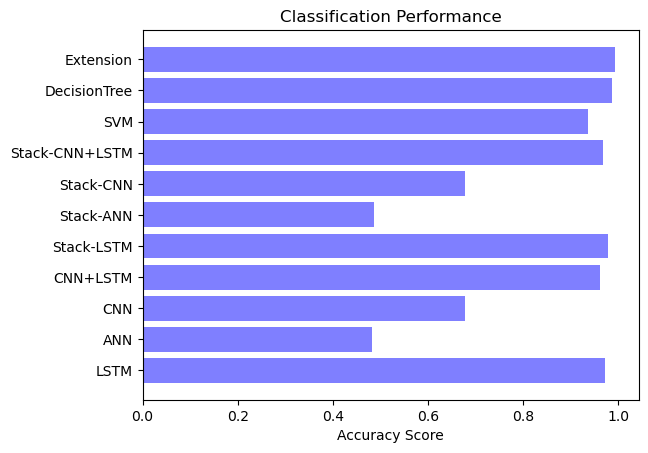

In [79]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

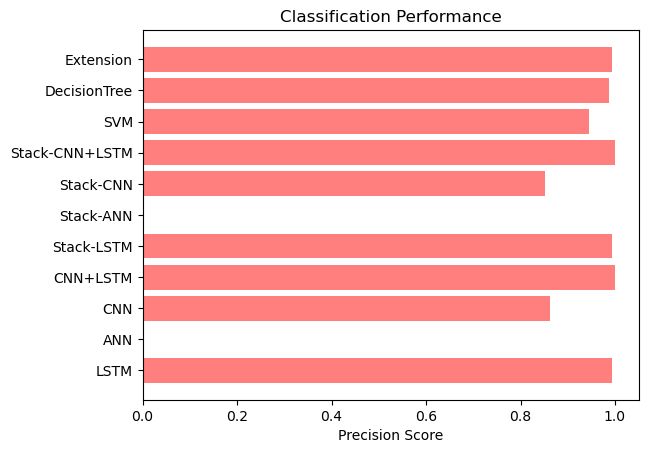

In [80]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

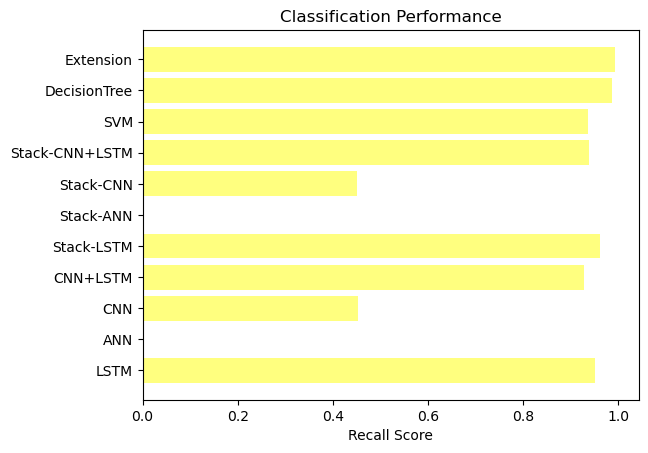

In [81]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

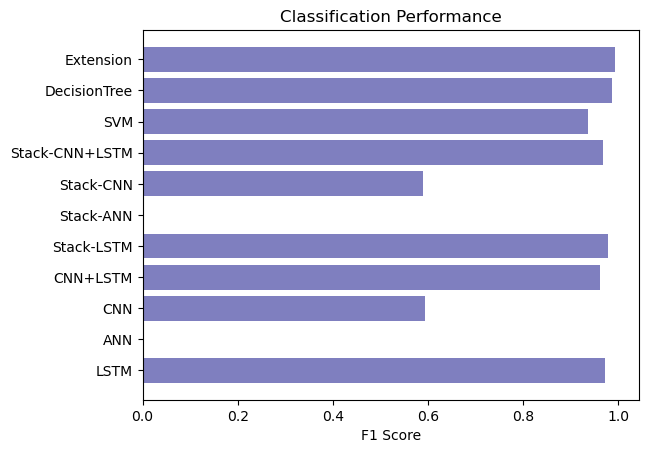

In [82]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()
